# Time samples analysis

Read from file the samples:

In [92]:
file="time_optimized_0_1000"
f = open(file+".txt")
l=[]
for line in f:
    l.append([w for w in line.replace("\t", " ").replace("\n", "").split(" ") if w != ''])
f.close()
# l[:3]

Convert the data to CSV (easier to pass them to pandas):

In [93]:
ll = []
i=0
while i<len(l):
    if "__" in l[i][0]:
        print(l[i])
        i+=1
    else:
        try:
            v, p, e = l[i][0][:-4].split("_")
            ll.append([int(v), float(p), int(e), 
                       float(l[i+2][1][:-1]), float(l[i+3][1][:-1]), float(l[i+4][1][:-1]), 
                       int(l[i+5][1]), int(l[i+6][1])])
            i+=7
        except:
            print([v, p, e, l[i+1][1][:-1], l[i+2][1][:-1], l[i+3][1][:-1], l[i+4][1], l[i+5][1], l[i+6][1]])
            i+=1
ll[1000]

[100, 0.091919, 874, 1.4e-05, 1.2e-05, 1e-05, 1, 1]

In [94]:
import csv
f = open(file+".csv", "w")
f.write("vertices,percentage,edges,tarjan,nuutila,pearce,components,correct\n")
w = csv.writer(f)
w.writerows(ll)
f.close()

# Load samples with pandas: 

In [95]:
import pandas as pd
t = pd.read_csv(file+".csv")
print ("Number of samples : ",t.count())
print("Incorrect results : ", t.correct[t.correct==0].count())

Number of samples :  vertices      29997
percentage    29997
edges         29997
tarjan        29997
nuutila       29997
pearce        29997
components    29997
correct       29997
dtype: int64
Incorrect results :  0


In [96]:
t.describe()

,vertices,percentage,edges,tarjan,nuutila,pearce,components,correct
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.0
mean,506.868687,0.089201,488.939094,0.000033,0.000024,0.000020,447.016502,1.0
std,289.517291,0.663596,289.680187,0.000030,0.000018,0.000025,333.775012,0.0
min,10.000000,0.000000,0.000000,0.000001,0.000001,0.000001,1.000000,1.0
25%,250.000000,0.000727,240.000000,0.000019,0.000014,0.000012,100.000000,1.0
50%,510.000000,0.001716,488.000000,0.000031,0.000023,0.000018,460.000000,1.0
75%,760.000000,0.006799,739.000000,0.000044,0.000031,0.000026,747.000000,1.0
max,1000.000000,11.111111,1002.000000,0.003047,0.000531,0.003233,1000.000000,1.0


### Remove outliers above the 99-th percentile for all the algorithms:

In [97]:
for alg in ["tarjan","nuutila","pearce"]:
    qt1=t[alg].quantile(0.99)
    print(alg, qt1)
    t = t[t[alg]<qt1]

tarjan 8.804000000000087e-05
nuutila 4.9e-05
pearce 3.8e-05


### Average samples with same number of vertices and edges:

In [98]:
t= t[["vertices","edges","tarjan","nuutila", "pearce"]].groupby(by=["vertices","edges"], as_index=False).mean()
t["v+e"]=t["vertices"]+t["edges"]

In [99]:
t.describe()

,vertices,edges,tarjan,nuutila,pearce,v+e
count,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000
mean,510.801172,491.620934,0.000032,0.000023,0.000019,1002.422105
std,286.763029,288.542831,0.000015,0.000011,0.000009,415.107089
min,10.000000,0.000000,0.000001,0.000001,0.000001,10.000000
25%,260.000000,240.000000,0.000019,0.000015,0.000012,700.000000
50%,510.000000,490.000000,0.000031,0.000023,0.000018,1006.000000
75%,760.000000,740.000000,0.000044,0.000031,0.000025,1301.000000
max,1000.000000,1002.000000,0.000082,0.000048,0.000037,2000.000000


# Plots
### In (V+E,t) space averaging 10 samples:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f851fea5e80>,
      dtype=object)

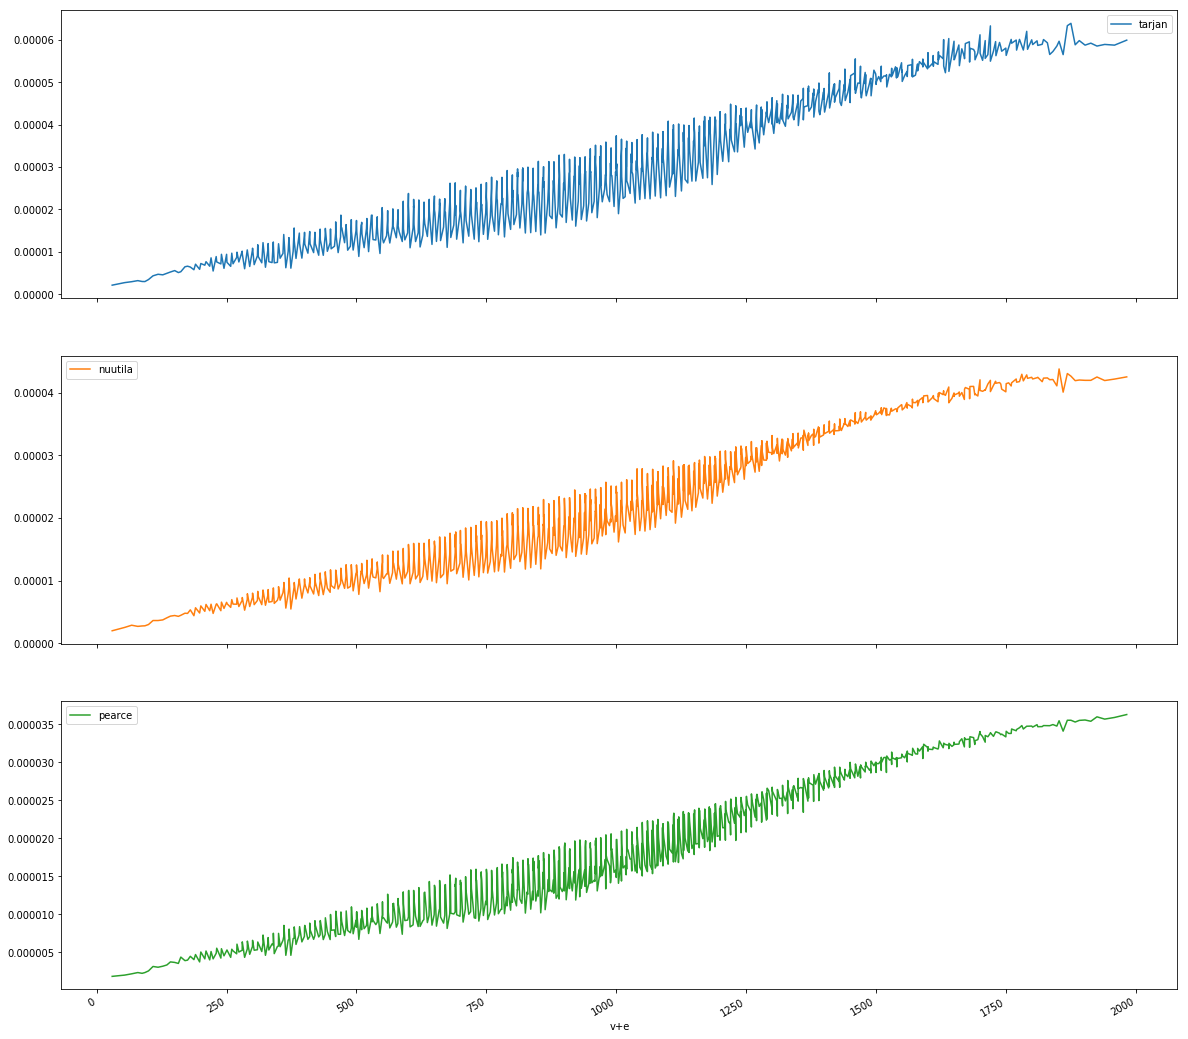

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
t = t.sort_values(by=["v+e","edges","vertices"])
t.groupby(np.arange(len(t))//10).mean().plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(20,20), subplots=True)

### In (V+E,t) space averaging 100 samples:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f851cef3240>,
      dtype=object)

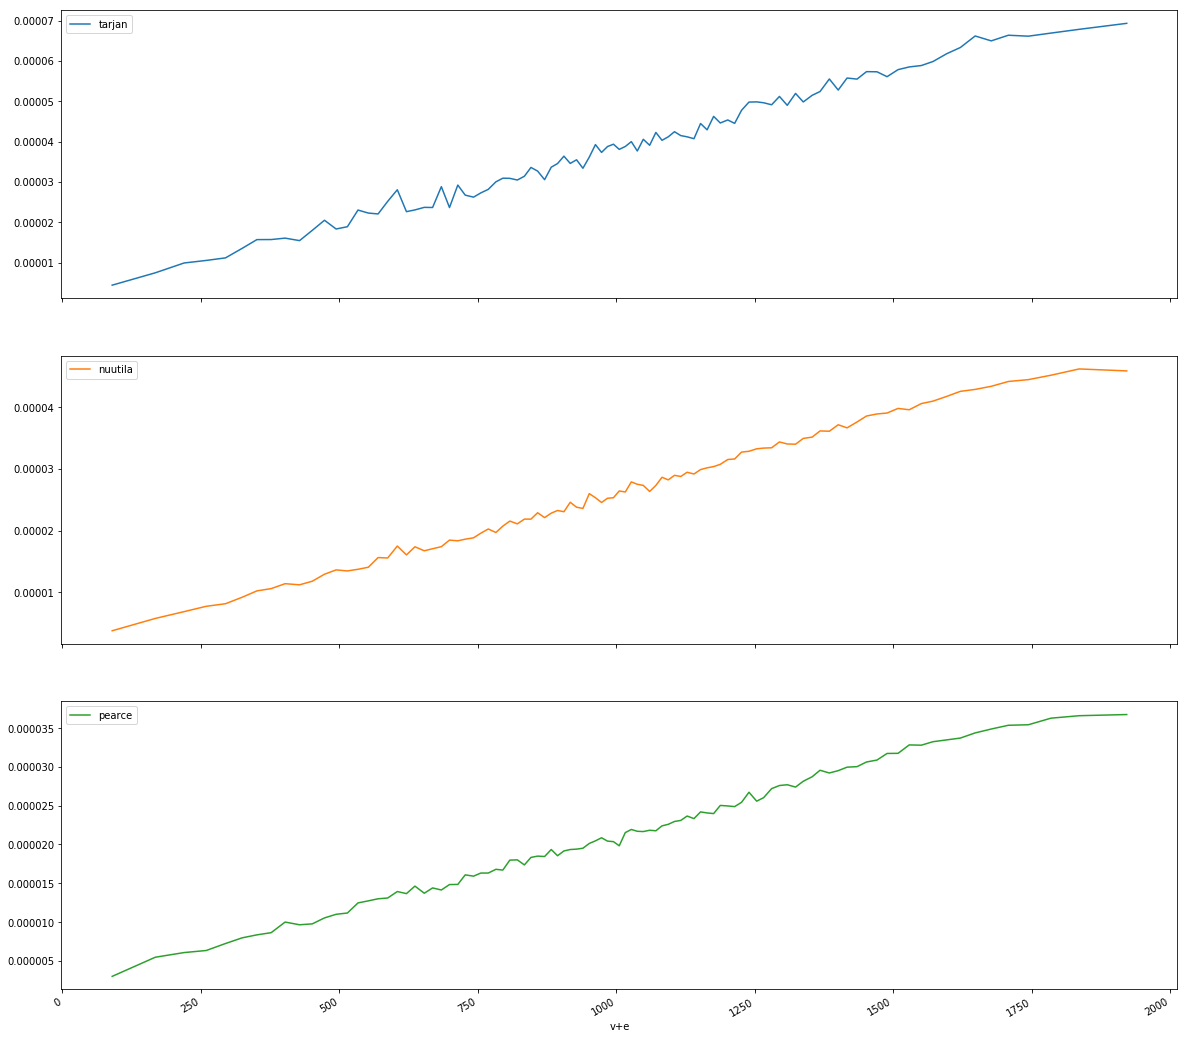

In [111]:
t.groupby(np.arange(len(t))//10).max().groupby(np.arange(len(t)/10)//10).mean().plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(20,20), subplots=True)

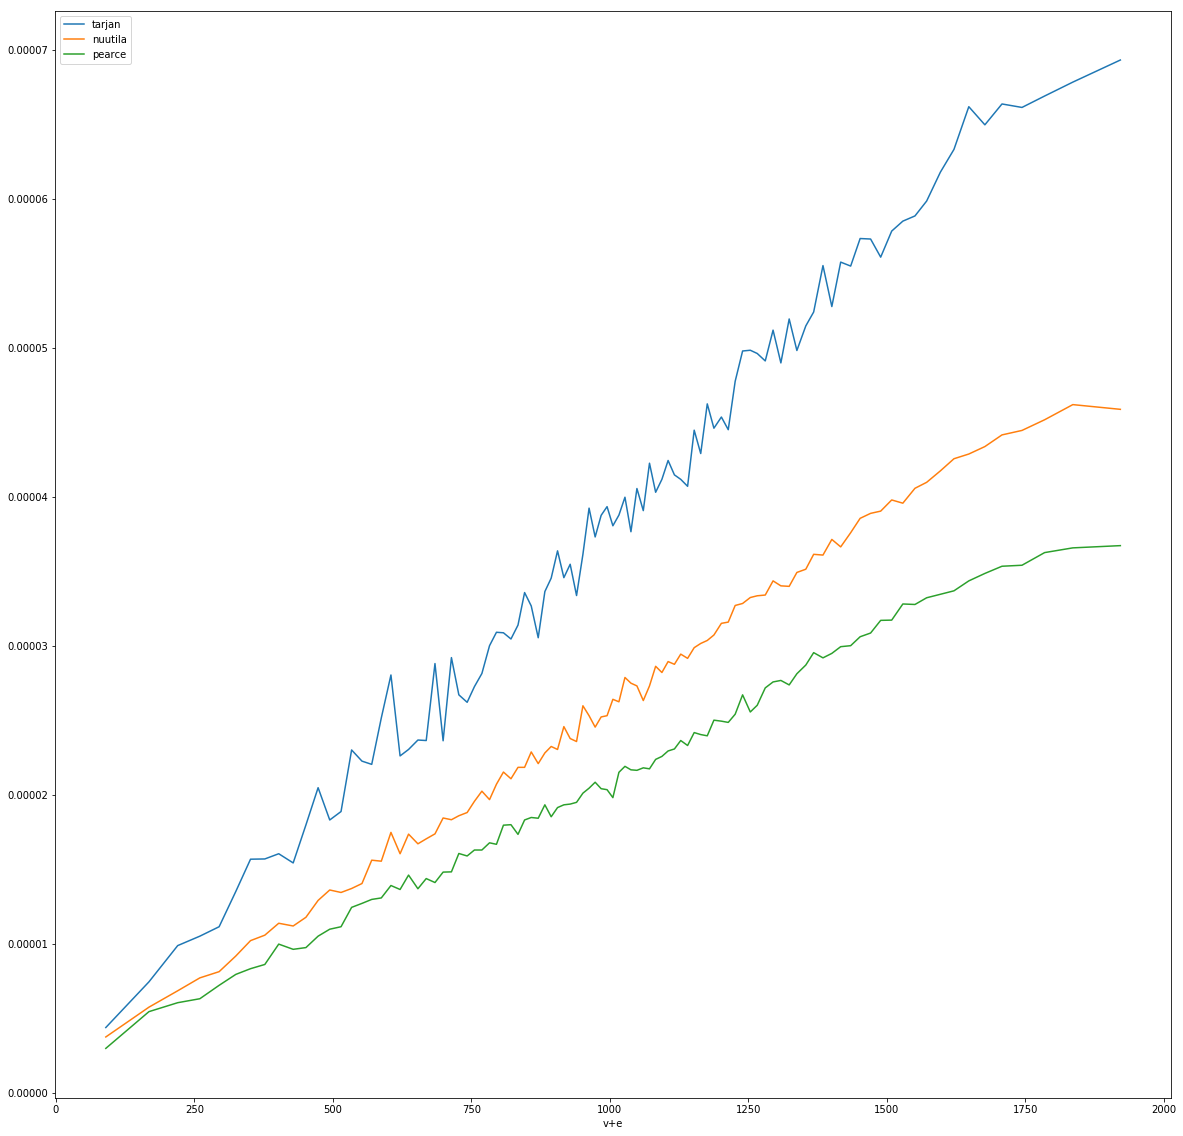

In [112]:
t.groupby(np.arange(len(t))//10).max().groupby(np.arange(len(t)/10)//10).mean().plot(x="v+e", y=["tarjan","nuutila","pearce"],figsize=(20,20), subplots=False)

In [103]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly

import pandas as pd
plotly.tools.set_credentials_file(username='pscorso93', api_key='K4XqlXUNVsiWVSEtsFEZ')

# Plots in (V,E,t) space:
## Tarjan:

In [104]:
x1 = np.linspace(t['vertices'].min(), t['vertices'].max(), len(t['vertices'].unique()))
y1 = np.linspace(t['edges'].min(), t['edges'].max(), len(t['edges'].unique()))

x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['vertices'], df['edges']), df['tarjan'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]

layout = go.Layout(
    title='Tarjan',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='elevations-3d-surface')

## Nuutila:

In [105]:
x1 = np.linspace(t['vertices'].min(), t['vertices'].max(), len(t['vertices'].unique()))
y1 = np.linspace(t['edges'].min(), t['edges'].max(), len(t['edges'].unique()))

x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['vertices'], df['edges']), df['nuutila'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]

layout = go.Layout(
    title='Nuutila',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='elevations-3d-surface')

## Pearce:

In [106]:
x1 = np.linspace(t['vertices'].min(), t['vertices'].max(), len(t['vertices'].unique()))
y1 = np.linspace(t['edges'].min(), t['edges'].max(), len(t['edges'].unique()))

x2, y2 = np.meshgrid(x1, y1)
z2 = griddata((df['vertices'], df['edges']), df['pearce'], (x2, y2), method='cubic')

data = [
    go.Surface(
        x=x2,
        y=y2,
        z=z2
    )
]

layout = go.Layout(
    title='Pearce',
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=65,
        r=50,
        b=65,
        t=90
    )
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='elevations-3d-surface')

